In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [10]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [11]:
PSO_DIR = get_last_folder("../build/results_pso/")
SA_DIR = get_last_folder("../build/results_sa/")
print("PSO_DIR: ", PSO_DIR)
print("SA_DIR: ", SA_DIR)

PSO_History = np.loadtxt(PSO_DIR + "/global_swarm.csv", delimiter=",", skiprows=1)
SA_History = np.loadtxt(SA_DIR + "/history_optimization.csv", delimiter=",", skiprows=1)
print(PSO_History.shape)
PSO_NbIter = PSO_History.shape[0]
PSO_NbCol = PSO_History.shape[1]
PSO_Iter = PSO_History[:,0]
PSO_Cost = PSO_History[:,-1]

SA_NbIter = SA_History.shape[0]
SA_NbCol = SA_History.shape[1]
SA_Iter = SA_History[:,0]
SA_Cost = SA_History[:,1]
SA_Temp = SA_History[:,2]

PSO_DIR:  ../build/results_pso/2023-02-21_13-10-28
SA_DIR:  ../build/results_sa/2023-02-21_12-08-01
(102, 15)


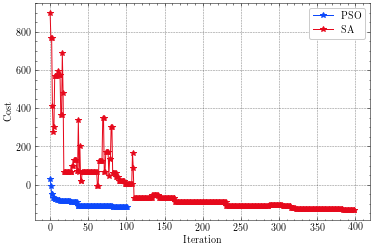

In [16]:
fig, ax = plt.subplots(1,1)
ax.plot(PSO_Iter, PSO_Cost, '*-', label="PSO")
ax.plot(SA_Iter, SA_Cost, '*-', label="SA")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.legend()
plt.savefig("cost_func.pdf", dpi=300)
